In [1]:
from lib import data as dat
from lib import Handler as handler
from lib import model_methods
import datetime
import logging
logging.getLogger('tensorflow').disabled = True     # Disable Tensorflow warning messages.
import yfinance as yf
import os
import datetime as dt
import shutil
import pandas as pd

# Define current directory and Database subdirectory.

In [2]:
cwd = os.getcwd()
directory = handler.directories(d = cwd)
db_subdir = directory.location('Data') # Find Database subdirectory location.

# Data Acquisition from Yahoo Finance

In [3]:
stocks_list = ['AAPL', 'MSFT', 'GOOGL', 'GSK', 'AZN', 'PFE']    # Stock list.
start_date = dt.datetime(2019, 11, 1) # Apporximate pandemic start date.

stocks = dat.data(start = start_date)    # Initiate stock class.
stocks.stocks(database = 'Pandemic_Stocks.db', stck = stocks_list, today = True) # Get stock data from Yahoo API.

db_output = directory.contents(dir = cwd, pattern = 'Pandemic_St', extension = '.db') # Find database output.
filename = os.path.basename(db_output)
slash = directory.OS()  # Operating system.
shutil.move(db_output, db_subdir + slash + filename)    # Move database output to Databases subdirectory.
db_path = directory.contents(dir = db_subdir, pattern = 'Pandemic_St', extension = '.db') # Find the new locations of the database.

Connecting to Yahoo Finance...
Fetching AAPL stock data...
[*********************100%***********************]  1 of 1 completed
Adding AAPL data to Pandemic_Stocks.db database...
AAPL stock data saved!

Fetching MSFT stock data...
[*********************100%***********************]  1 of 1 completed
Adding MSFT data to Pandemic_Stocks.db database...
MSFT stock data saved!

Fetching GOOGL stock data...
[*********************100%***********************]  1 of 1 completed
Adding GOOGL data to Pandemic_Stocks.db database...
GOOGL stock data saved!

Fetching GSK stock data...
[*********************100%***********************]  1 of 1 completed
Adding GSK data to Pandemic_Stocks.db database...
GSK stock data saved!

Fetching AZN stock data...
[*********************100%***********************]  1 of 1 completed
Adding AZN data to Pandemic_Stocks.db database...
AZN stock data saved!

Fetching PFE stock data...
[*********************100%***********************]  1 of 1 completed
Adding PFE data 

# SQL Queries

In [4]:
# Data Query. All SQL tables are added into individual pandas dataframes.
apple = dat.SQLite_Query(db_path, stocks_list[0]) 
microsoft = dat.SQLite_Query(db_path, stocks_list[1])
google = dat.SQLite_Query(db_path, stocks_list[2])
gsk = dat.SQLite_Query(db_path, stocks_list[3])
astra = dat.SQLite_Query(db_path, stocks_list[4])
pfizer = dat.SQLite_Query(db_path, stocks_list[5])


# Data Preprocessing

In [5]:
pred_days = 365 # number of days used for prediction.

apple_preprocessing = model_methods.preprocessing(apple, pred_days)
microsoft_preprocessing = model_methods.preprocessing(microsoft, pred_days) 
google_preprocessing = model_methods.preprocessing(google, pred_days) 
gsk_preprocessing = model_methods.preprocessing(gsk, pred_days) 
astra_preprocessing = model_methods.preprocessing(astra, pred_days) 
pfizer_preprocessing = model_methods.preprocessing(pfizer, pred_days)  

# Apple Stock

Training the model...
[*********************100%***********************]  1 of 1 completed


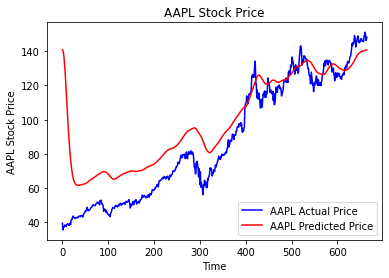

AAPL Stock Prediction: 140.844101


In [6]:
apple_x_train = apple_preprocessing[0]
apple_y_train = apple_preprocessing[1]
apple_scaler = apple_preprocessing[2]

# Training starts.
print('Training the model...')
AAPL_model = model_methods.CNN_model(apple_x_train, apple_y_train, 50, 1, 'adam', 'mean_squared_error', 25, 32)

# Test data.
test_start = dt.datetime(2019, 1, 1)
test_end = datetime.datetime.now().date().isoformat()   # Today.
apple_test_data = yf.download(tickers = stocks_list[0], start = test_start, end = test_end)
apple_actual_prices = apple_test_data['Close'].values

apple_dataset = pd.concat((apple['Close'], apple_test_data['Close']), axis = 0)
apple_model_inputs = apple_dataset[len(apple_dataset) - len(apple_test_data) - pred_days:].values
apple_model_inputs = apple_model_inputs.reshape(-1, 1)
apple_model_inputs = apple_scaler.transform(apple_model_inputs)

# Make predictions on test data.
apple_x_test = model_methods.test_preprocessing(pred_days, apple_model_inputs)
apple_pred_prices = AAPL_model.predict(apple_x_test, verbose = 0)
apple_pred_prices = apple_scaler.inverse_transform(apple_pred_prices)

# Plot Results
model_methods.plot_data(name = stocks_list[0], type = 'Stock', actual = apple_actual_prices, predicted = apple_pred_prices, colour_actual = "blue", colour_predicted = "red")

# Predict next day
model_methods.next_day_prediction(input = apple_model_inputs, name = stocks_list[0], type = 'Stock', prediction_days = pred_days, model = AAPL_model, scaler = apple_scaler)

# Microsoft Stock

Training the model...
[*********************100%***********************]  1 of 1 completed


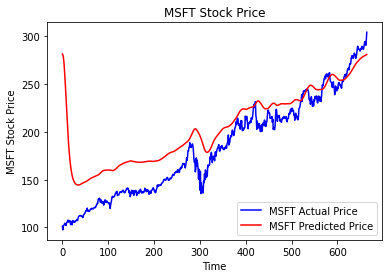

MSFT Stock Prediction: 281.489899


In [7]:
microsoft_x_train = microsoft_preprocessing[0]
microsoft_y_train = microsoft_preprocessing[1]
microsoft_scaler = microsoft_preprocessing[2]

# Training starts.
print('Training the model...')
MSFT_model = model_methods.CNN_model(microsoft_x_train, microsoft_y_train, 50, 1, 'adam', 'mean_squared_error', 25, 32)

# Test data.
test_start = dt.datetime(2019, 1, 1)
test_end = datetime.datetime.now().date().isoformat()   # Today.
microsoft_test_data = yf.download(tickers = stocks_list[1], start = test_start, end = test_end)
microsoft_actual_prices = microsoft_test_data['Close'].values

microsoft_dataset = pd.concat((microsoft['Close'], microsoft_test_data['Close']), axis = 0)
microsoft_model_inputs = microsoft_dataset[len(microsoft_dataset) - len(microsoft_test_data) - pred_days:].values
microsoft_model_inputs = microsoft_model_inputs.reshape(-1, 1)
microsoft_model_inputs = microsoft_scaler.transform(microsoft_model_inputs)

# Make predictions on test data.
microsoft_x_test = model_methods.test_preprocessing(pred_days, microsoft_model_inputs)
microsoft_pred_prices = MSFT_model.predict(microsoft_x_test, verbose = 0)
microsoft_pred_prices = microsoft_scaler.inverse_transform(microsoft_pred_prices)

# Plot Results
model_methods.plot_data(name = stocks_list[1], type = 'Stock', actual = microsoft_actual_prices, predicted = microsoft_pred_prices, colour_actual = "blue", colour_predicted = "red")

# Predict next day
model_methods.next_day_prediction(input = microsoft_model_inputs, name = stocks_list[1], type = 'Stock', prediction_days = pred_days, model = MSFT_model, scaler = microsoft_scaler)